# Prevendo as notas de Matématica do enem 2016

[![author](https://img.shields.io/badge/Author-Davi_Santos-green.svg)](https://www.linkedin.com/in/davi96-dev/) 
[![](https://img.shields.io/badge/Python-3.7+-red.svg)](https://www.python.org/) 
[![contributions welcome](https://img.shields.io/badge/contributions-welcome-brightgreen.svg?style=flat)](https://github.com/Dls96/Aprenda_Ingles_Projeto/issues)

![](./logo.png)

O Exame Nacional do ensino médio é a porta de entrada para várias pessoas Que desejam fazer uma faculdade,
Foi criada em 1998, e consiste em uma prova de multiplas escolhas, geralmente as provas duram de 3 a 5 horas,até 2016, as provas aconteciam nos Sábados e Domingos. Nas provas as perguntas são separadas por matérias que são: Ciências da Natureza (Biologia,Química,Física), Ciências Humanas e suas tecnologia (Fisolofia,Sociologia,Geografia e História), Linguagens, códigos e suas tecnologias (Lingua Portuguesa,Estrangeira,Literatura,Artes, Educação Física e informática), matemática e suas tecnologias e a temida redação.

# Desafio da Codenation
Esse desafio foi feito pela [Codenation](https://www.codenation.dev) , e nela precisavamos prever a nota da matéria de Matemática utilizando os datasets dados pela mesma.
Se eu conseguisse atingir uma precisão de no mínimo 90% com nosso modelo de Machine Learning, conseguiria um curso de Data Science totalmente gratuito com a duração de 2 meses. Vamos a solução.


# Dicionário de variáveis
O dataset Original Possui 167 Colunas e várias delas não possuem correlação, então mostrarei somente as colunas que possivelmente tem uma correlação com a variável NU_NOTA_MT.
* TP_DEPENDENCIA_ADM_ESC: Mostra qual o tipo da escola em que o candidato estudou
    * 1 - Escola Federal
    * 2 - Escola Estadual
    * 3 - Escola Municipal
    * 4 - Escola Privada
* NU_NOTA_CN: Nota da prova de Ciências da Natureza
* NU_NOTA_CH: Nota da prova de Ciências Humanas
* NU_NOTA_LC: Nota da prova de Linguagens e Códigos
* **NU_NOTA_MT: Nota da prova de Matemática (Nosso Target)**
* NU_NOTA_COMP1: Nota da competência 1 (Redação) - demonstrar dominio escrito da Lingua Portuguesa
* NU_NOTA_COMP2: Nota da competência 2 (Redação) - compreender a proposta da redação
* NU_NOTA_COMP3: Nota da competência 3 (Redação) - Selecionar, relacionar, interpretar fatos e opniões
* NU_NOTA_COMP4: Nota da competência 4 (Redação) - demonstrar conhecimento linguistico para argumentação.
* NU_NOTA_COMP5: Nota da competência 5 (Redação) - Elaborar proposta de intervenção para o problema abordado.
* NU_NOTA_REDACAO: Nota da prova de Redação
* TP_PRESENCA_CN: Presença na prova de Ciências da Natureza
* TP_PRESENCA_CH: Presença na prova de Ciências Humanas
* TP_PRESENCA_LC: Presença na prova de Linguagens e Códigos
* TP_PRESENCA_MT: Presença na prova de Matemática
* Q006: Mostra a renda familiar do candidato.
* Q047: Mostra qual tipo de escola o candidato frequentou.
    * A - Somente em escola Pública
    * B - Parte em escola publica e parte em escola privada sem bolsa de estudo integral
    * C - Parte em escola publica e parte em escola privada com bolsa de estudo integral
    * D - Somente em escola Privada sem bolsa de estudo integral
    * E - Somente em escola privada com bolsa de estudo integral

# Análise dos dados
Primeiramente precisamos importar algumas bibliotecas necessária para nossa análise e visualização dos dados. Após isso carregamos nossos dados de treino e teste.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)

%matplotlib inline

In [2]:
# Carregando os dados

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

NU_INSCRICAO = test.NU_INSCRICAO

Então verificamos quais variáveis tem valores NaN, vemos que o a maioria dos valores faltantes são sobre as notas, isso porque temos pessoas que não foram ou foram eliminadas das provas. E o outro valor que é TP_ADM_DEPENDENCIA_ESC , nos diz em qual escola o candidato estudou **(essa variável é muito importante para sabermos se essa pessoa teve uma educação de qualidade ).** e tendo uma educação boa, consequentemente teve uma nota alta.
Primeiramente vamos tratar a coluna TP_ADM_DEPENDENCIA_ESC, como eu consegui preenchê-las? bom... com a variável Q047, que diz em que tipo de escola o candidato frequentou. Sabemos que escolas Estaduais e Municipais são gratuitas, Escolas Privadas e Federais (que para mim sejam faculdades) serão pagas. Então eu fiz uma regrinha vamos lá: 
* Se a Questão for: 
  * A - B iremos preencher com escolas estaduais, pois deduzi que são a maioria no brasil. 
  * C - D - E Iremos preencher com escola privada. 
 
As escolas Federais (Deduzo eu...Faculdades) eu removi, pois a grande maioria são pessoas que acabaram de sair do ensino médio.

In [3]:
train.TP_DEPENDENCIA_ADM_ESC.loc[(train['Q047'].between('A', 'B') & train['TP_DEPENDENCIA_ADM_ESC'].isna())] = 2
train.TP_DEPENDENCIA_ADM_ESC.loc[(train['Q047'].between('C', 'E') & train['TP_DEPENDENCIA_ADM_ESC'].isna())] = 4

Após trabalharmos com a coluna TP_DEPENDENCIA_ADM_ESC, vamos agora para as colunas de Notas,Vamos conseguir preenchê-las de acordo com as colunas TP_PRESENCA , para se ter notas primeiramente precisamos estar presente, então se estivermos presentes, temos que seguir as regras, se não, podemos ser eliminados. Seguindo isso conseguirmos preencher todas as notas faltantes, pois temos 2 condições que queremos analisar na coluna TP_PRESENCA: 0, não esteve presente e 2,foi eliminado.

In [4]:
# Zerando os valores nulos das Notas de acordo com a presença de cada matéria

train.NU_NOTA_CN.loc[
    (train['TP_PRESENCA_CN'] == 0) | (train['TP_PRESENCA_CN'] == 2) & (train['NU_NOTA_CN'].isnull())
] = 0

train.NU_NOTA_CH.loc[
    (train['TP_PRESENCA_CH'] == 0) | (train['TP_PRESENCA_CH'] == 2) & (train['NU_NOTA_CH'].isnull())
] = 0

train.NU_NOTA_LC.loc[
    (train['TP_PRESENCA_LC'] == 0) | (train['TP_PRESENCA_LC'] == 2) & (train['NU_NOTA_LC'].isnull())
] = 0

train.NU_NOTA_MT.loc[
    (train['TP_PRESENCA_MT'] == 0) | (train['TP_PRESENCA_MT'] == 2) & (train['NU_NOTA_MT'].isnull())  
] = 0

train.NU_NOTA_REDACAO.loc[
    (train['NU_NOTA_COMP1'].isnull()) & (train['NU_NOTA_COMP2'].isnull()) &
    (train['NU_NOTA_COMP3'].isnull()) & (train['NU_NOTA_COMP4'].isnull()) &
    (train['NU_NOTA_COMP5'].isnull())
] = 0

E por último, vamos preencher os valores NU_NOTA_COMPx com 0, pois as NU_NOTA_REDACAO foram zeradas.

In [5]:
for i in range(1, 6):
    train[f'NU_NOTA_COMP{i}'].fillna(0, inplace=True)

In [6]:
# aqui eu pego todas as colunas que tem uma correlação forte positiva com a variavel target

df = pd.DataFrame(train.corr()['NU_NOTA_MT'] > 0.7)

df = df[df['NU_NOTA_MT'] == True]
df.index

Index(['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO'],
      dtype='object')

In [7]:
# passando somente as colunas mostradas anteriormente para nosso df de treino e teste
train = train[df.index]


In [8]:
train.head()

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,1,1,1,1,436.3,495.4,581.2,399.4,120.0,120.0,120.0,80.0,80.0,520.0
1,1,1,1,1,474.5,544.1,599.0,459.8,140.0,120.0,120.0,120.0,80.0,580.0
2,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Agora fazemos as mesmas transformações na base de teste

In [9]:
test.TP_DEPENDENCIA_ADM_ESC.loc[(test['Q047'].between('A', 'B') & test['TP_DEPENDENCIA_ADM_ESC'].isna())] = 2
test.TP_DEPENDENCIA_ADM_ESC.loc[(test['Q047'].between('C', 'E') & test['TP_DEPENDENCIA_ADM_ESC'].isna())] = 4

In [10]:
# Zerando os valores nulos das Notas de acordo com a presença de cada matéria

test.NU_NOTA_CN.loc[
    (test['TP_PRESENCA_CN'] == 0) | (test['TP_PRESENCA_CN'] == 2) & (test['NU_NOTA_CN'].isnull())
] = 0

test.NU_NOTA_CH.loc[
    (test['TP_PRESENCA_CH'] == 0) | (test['TP_PRESENCA_CH'] == 2) & (test['NU_NOTA_CH'].isnull())
] = 0

test.NU_NOTA_LC.loc[
    (test['TP_PRESENCA_LC'] == 0) | (test['TP_PRESENCA_LC'] == 2) & (test['NU_NOTA_LC'].isnull())
] = 0

test.NU_NOTA_REDACAO.loc[
    (test['NU_NOTA_COMP1'].isnull()) & (test['NU_NOTA_COMP2'].isnull()) &
    (test['NU_NOTA_COMP3'].isnull()) & (test['NU_NOTA_COMP4'].isnull()) &
    (test['NU_NOTA_COMP5'].isnull())
] = 0

In [11]:
test = test[[i for i in df.index if i != 'NU_NOTA_MT' and i != 'TP_PRESENCA_MT']]

In [12]:
for i in range(1, 6):
    test[f'NU_NOTA_COMP{i}'].fillna(0, inplace=True)

In [13]:
test.isna().sum()

TP_PRESENCA_CN     0
TP_PRESENCA_CH     0
TP_PRESENCA_LC     0
NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
NU_NOTA_REDACAO    0
dtype: int64

### Pré-Processamento dos dados

Os modelos de Machine Learning não se dão muito bem com números grandes, eles demoram para processar, para solucionar esse problema utilizamos as classes de pré-processamento da biblioteca sklearn.preprocessing, no nosso caso utilizaremos a classe StandardScaler, onde ele pega valor por valor subtrai pela média da coluna em questão e divide pelo desvio padrão.
$$z = \dfrac{x_{i} - \mu} \sigma $$ 



In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

cols_to_scale = [c for c in train.columns if c not in ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT']]

for col in cols_to_scale:
    if col != 'NU_NOTA_MT':
        train[col] = sc.fit_transform(train[col].values.reshape(-1, 1))

for col in cols_to_scale:
    if col != 'NU_NOTA_MT':
        test[col] = sc.fit_transform(test[col].values.reshape(-1, 1))

## Criando modelo e avaliando
A parte mais trabalhosa já foi, e agora podemos então criar, treinar, reavaliar e então prever os resultados. Primeiro vamos pegar nossos dados de entrada features , e de saída target.



In [15]:
# X = features y = Target
X = train.drop(['NU_NOTA_MT', 'TP_PRESENCA_MT'], axis=1)
y = train.NU_NOTA_MT

Agora separamos os dados de treino e teste, separei 80% para treino, e 20% para teste. e já importei alguns modelos de ML, que acredito que sejam os melhores para esse problema. E também importei algumas funções para medir a acurácia dos modelos. 

In [16]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from math import sqrt

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, train_size=.8, random_state=42)

Aqui eu criei um dicionário com vários modelos para testar rapidamente os modelos e pegar o melhor. Vamos verificar o Mean Squared Error (Erro quadrático médio), é uma forma de verificar as diferenças entre o modelo previsto (Neste caso, nosso resultado de X_teste) e os valores originais (nosso y_teste) .



In [17]:
# Testando multiplos modelos

models = {
    'RandomForest': RandomForestRegressor(n_estimators=200, max_depth=8, n_jobs=-1),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=1000, learning_rate=0.009),
    'DecisionTree': DecisionTreeRegressor(),
    'CatBoost': CatBoostRegressor(silent=True),
    'XGB': XGBRegressor(),
    'ExtraTrees': ExtraTreesRegressor(),
    'KNN': KNeighborsRegressor(weights='distance', algorithm='brute')
}

for model in models:
    print(model)
    models[model].fit(X_treino, y_treino)
    y_pred = models[model].predict(X_teste)
    print(f'MSE: {mean_squared_error(y_pred=y_pred, y_true=y_teste)}')

RandomForest
MSE: 4083.7941073267234
GradientBoosting
MSE: 4074.7217561738107
DecisionTree
MSE: 9010.955356882738
CatBoost
MSE: 4388.376340248227
XGB
MSE: 4767.7149802656295
ExtraTrees
MSE: 4512.436225768391
KNN
MSE: 5093.55027808591


Os modelos RandomForest e GradientBoosting tiveram um bom MSE, mas o gradient foi bem menor, então vamos utilizá-lo. 

In [18]:
# O melhor modelo foi o GradientBoosting
gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.009)
gbr.fit(X_treino, y_treino)

GradientBoostingRegressor(learning_rate=0.009, n_estimators=1000)

In [19]:
y_pred = gbr.predict(X_teste)
print(f'MSE: {mean_squared_error(y_pred=y_pred, y_true=y_teste)}')

MSE: 4075.3898426233836


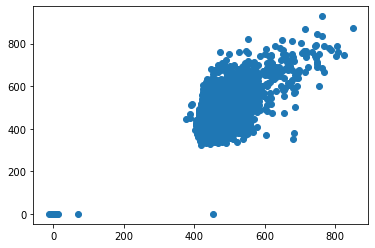

In [20]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_teste)

In [21]:
print(f'R2_score: {r2_score(y_pred=y_pred, y_true=y_teste)}')

R2_score: 0.9249300066509794


Então tentamos prever os valores de teste, e plotamos para visualizar as diferenças entre os dados previstos e os originais, e parecem não serem grandes. e também vemos a acurácia do teste, r2_score 92.4%. Quando eu fiz para tentar ganhar o curso tive r2_score de 91.7%, consegui melhorar consideravelmente.

Agora vamos prever as notas na base de teste e arredondar para 2 casas decimais, como são as notas do ENEM.

In [22]:
result = gbr.predict(test)
result = np.round(result, 2)
result[0]

434.63

In [23]:
# Então criamos um novo dataframe com os resultados previstos, e a variavel onde guardamos todos os números de inscrição da base de teste

solution = pd.DataFrame({
    'NU_INSCRICAO': NU_INSCRICAO, 
    'NU_NOTA_MT': result
})

In [24]:
# salvamos o dataframe criado acima como arquivo csv e passamos index=False, para não ter uma coluna com o valor do índice.

solution.to_csv('data/answer.csv', index=False)

Esse foi meu score anteriormente, com certeza se eu conseguisse verificar agora, iria ter um score bem maior que esse.

 ![](./score_anterior.PNG)
